## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

## DATA CLEANING AND FEATURE ENGINEERING

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [305]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [306]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### APP COLUMN
- NO NEED TO ALTER IT'S NAME OF APP

#### CATEGORY COLUMN
- Convert to numeric 

In [307]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [308]:
df['Category'].replace('1.9',df['Category'].mode()[0],inplace=True)

In [309]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [310]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [311]:
df['Category'] = le.fit_transform(df['Category'])

In [312]:
df.shape

(10841, 13)

In [313]:

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [314]:
df.dtypes

App                object
Category            int64
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Ratings Column
- Replacing missing values with mode

In [315]:
df['Rating'].isnull().sum()

1474

In [316]:
df['Rating'].mean()

4.193338315362443

In [317]:
df['Rating'].mode()[0]

4.4

In [318]:
df['Rating'].isnull().sum()

1474

In [319]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,0,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,2,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,2,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,2,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",2,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,20,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,27,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,19,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,4,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [320]:
df['Rating'] = df['Rating'].replace(df['Rating'].max(), df['Rating'].mode()[0])

In [321]:
df['Rating'] =df['Rating'].fillna(df['Rating'].mode()[0])

In [322]:
df['Rating'].isnull().sum()

0

<AxesSubplot: >

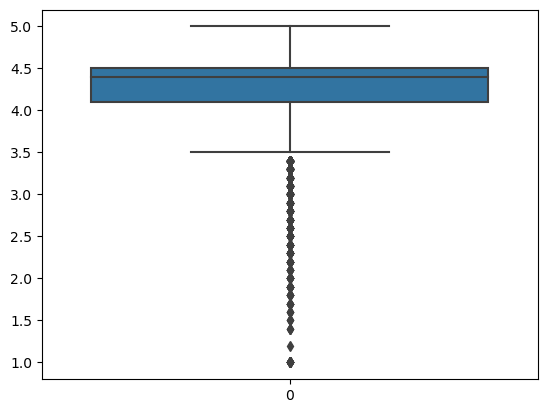

In [323]:
sns.boxplot(df['Rating'])

#### REVIEWS COLUMNS
- Convert string to int

In [324]:
lst=df['Reviews'].to_list()

In [325]:
for i in range(len(lst)):
    if(lst[i]=='3.0M'):
        lst[i]=3000000
    lst[i]=int(lst[i])
df['Reviews']=lst


In [326]:
df.dtypes

App                object
Category            int64
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Size COLUMNS
- Convert string to int

In [327]:
lst=df['Size'].to_list()

In [328]:
for i in range(len(lst)):
    lst[i]=lst[i].replace('M','')
    try:
        lst[i]=float(lst[i])
    except Exception:
        lst[i]=-1

In [329]:
df['Size']=lst

In [330]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [331]:
df.dtypes

App                object
Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<AxesSubplot: >

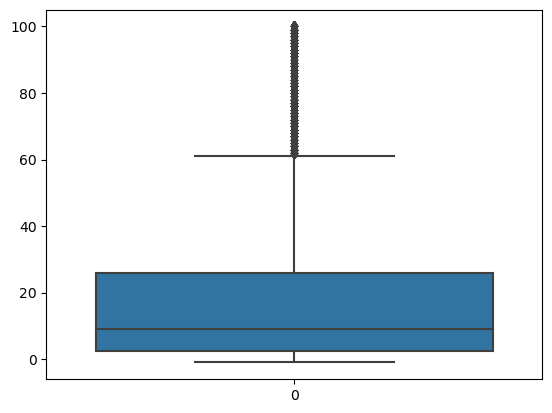

In [463]:
sns.boxplot(df['Size'])

In [475]:
lst=df['Size'].to_list()

#### INSTALLS COLUMNS
- Convert string to int

In [332]:
lst=df['Installs'].to_list()

In [333]:
for i in range(len(lst)):
    lst[i]=lst[i].replace('+','')
    lst[i]=lst[i].replace(',','')
    lst[i]=lst[i].replace('Free','0')
    lst[i]=int(lst[i])

In [334]:
df['Installs']=lst

In [335]:
df.dtypes

App                object
Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Type Column

In [336]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [337]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [338]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [339]:
df['Type'] =df['Type'].fillna(df['Type'].mode()[0])

In [340]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  int64  
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.1+ MB


In [342]:
df['Type'] =df['Type'].replace('0',df['Type'].mode()[0])

In [343]:
df['Type'].value_counts()

Free    10041
Paid      800
Name: Type, dtype: int64

In [344]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [345]:
df1=pd.DataFrame(encoder.fit_transform(df[['Type']]).toarray(),columns=encoder.get_feature_names_out())

In [346]:
df1

,Type_Free,Type_Paid
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
10836,1.0,0.0
10837,1.0,0.0
10838,1.0,0.0
10839,1.0,0.0


In [347]:
df= pd.concat([df1, df], axis=1)

In [296]:
df

,Type_Free,Type_Paid,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,1.0,0.0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1.0,0.0,Coloring book moana,0,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,1.0,0.0,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,1.0,0.0,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,1.0,0.0,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,1.0,0.0,Sya9a Maroc - FR,11,4.5,38,53.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,1.0,0.0,Fr. Mike Schmitz Audio Teachings,11,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,1.0,0.0,Parkinson Exercices FR,20,4.4,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,1.0,0.0,The SCP Foundation DB fr nn5n,3,4.5,114,-1.0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [349]:
df.drop(['Type'], axis=1,inplace=True)

In [351]:
df.shape

(10841, 14)

In [352]:
df

,Type_Free,Type_Paid,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,1.0,0.0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1.0,0.0,Coloring book moana,0,3.9,967,14.0,500000,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,1.0,0.0,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,1.0,0.0,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,1.0,0.0,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,1.0,0.0,Sya9a Maroc - FR,11,4.5,38,53.0,5000,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,1.0,0.0,Fr. Mike Schmitz Audio Teachings,11,5.0,4,3.6,100,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,1.0,0.0,Parkinson Exercices FR,20,4.4,3,9.5,1000,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,1.0,0.0,The SCP Foundation DB fr nn5n,3,4.5,114,-1.0,1000,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [353]:
df.dtypes

Type_Free         float64
Type_Paid         float64
App                object
Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### PRICES COLUMNS


In [357]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [364]:
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [358]:
lst=df['Price'].to_list()

In [360]:
for i in range(len(lst)):
    lst[i]=lst[i].replace('$','')
    lst[i]=lst[i].replace('Everyone','0')
    lst[i]=float(lst[i])

In [365]:
df['Price']=lst

In [366]:
df.dtypes

Type_Free         float64
Type_Paid         float64
App                object
Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [367]:
df.isnull().sum()

Type_Free         0
Type_Paid         0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

#### CONTENT WRITING COLUMN

In [368]:
df['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10841, dtype: object

In [369]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [371]:
df['Content Rating'] =df['Content Rating'].fillna(df['Content Rating'].mode()[0])

In [373]:
df.isnull().sum()

Type_Free         0
Type_Paid         0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [374]:
df1=pd.DataFrame(encoder.fit_transform(df[['Content Rating']]).toarray(),columns=encoder.get_feature_names_out())
df= pd.concat([df1, df], axis=1)

In [375]:
df

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Coloring book moana,0,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Sya9a Maroc - FR,11,4.5,38,53.0,5000,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Fr. Mike Schmitz Audio Teachings,11,5.0,4,3.6,100,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Parkinson Exercices FR,20,4.4,3,9.5,1000,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,The SCP Foundation DB fr nn5n,3,4.5,114,-1.0,1000,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [376]:
df.shape

(10841, 20)

In [377]:
df.dtypes

Content Rating_Adults only 18+    float64
Content Rating_Everyone           float64
Content Rating_Everyone 10+       float64
Content Rating_Mature 17+         float64
Content Rating_Teen               float64
Content Rating_Unrated            float64
Type_Free                         float64
Type_Paid                         float64
App                                object
Category                            int64
Rating                            float64
Reviews                             int64
Size                              float64
Installs                            int64
Price                             float64
Content Rating                     object
Genres                             object
Last Updated                       object
Current Ver                        object
Android Ver                        object
dtype: object

In [378]:
df.drop(['Content Rating'], axis=1,inplace=True)

In [379]:
df

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Coloring book moana,0,3.9,967,14.0,500000,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Sya9a Maroc - FR,11,4.5,38,53.0,5000,0.0,Education,"July 25, 2017",1.48,4.1 and up
10837,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Fr. Mike Schmitz Audio Teachings,11,5.0,4,3.6,100,0.0,Education,"July 6, 2018",1.0,4.1 and up
10838,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Parkinson Exercices FR,20,4.4,3,9.5,1000,0.0,Medical,"January 20, 2017",1.0,2.2 and up
10839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,The SCP Foundation DB fr nn5n,3,4.5,114,-1.0,1000,0.0,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [380]:
df.shape

(10841, 19)

In [381]:
df.dtypes

Content Rating_Adults only 18+    float64
Content Rating_Everyone           float64
Content Rating_Everyone 10+       float64
Content Rating_Mature 17+         float64
Content Rating_Teen               float64
Content Rating_Unrated            float64
Type_Free                         float64
Type_Paid                         float64
App                                object
Category                            int64
Rating                            float64
Reviews                             int64
Size                              float64
Installs                            int64
Price                             float64
Genres                             object
Last Updated                       object
Current Ver                        object
Android Ver                        object
dtype: object

#### Genres of no use as we have categories of same classification so let it be as it is we will use at it

In [384]:
df['Genres'].value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

In [385]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [398]:
df['Last Updated'] =df['Last Updated'].replace('1.0.19',df['Last Updated'].mode()[0])

In [399]:
lst=df['Last Updated'].to_list()

In [412]:
lst1=[]
lst2=[]
lst3=[]
for i in lst:
    lst1.append(i.split(' ')[0])
    lst2.append(int(i.split(' ')[1].replace(',','')))
    lst3.append(int(i.split(' ')[2]))

In [418]:
df['Day']=lst2
df['Year']=lst3

In [420]:
df.drop(['Month'], axis=1,inplace=True)

In [422]:
df['Month']=lst1

In [426]:
df['Month'] =df['Month'].replace({'January':1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12})

In [427]:
df['Month'].value_counts()

7     3163
8     1595
6     1273
5      978
3      667
4      616
2      533
1      491
12     426
10     398
11     387
9      314
Name: Month, dtype: int64

In [429]:
df.drop(['Last Updated'], axis=1,inplace=True)

In [430]:
df.dtypes

Content Rating_Adults only 18+    float64
Content Rating_Everyone           float64
Content Rating_Everyone 10+       float64
Content Rating_Mature 17+         float64
Content Rating_Teen               float64
Content Rating_Unrated            float64
Type_Free                         float64
Type_Paid                         float64
App                                object
Category                            int64
Rating                            float64
Reviews                             int64
Size                              float64
Installs                            int64
Price                             float64
Genres                             object
Current Ver                        object
Android Ver                        object
Day                                 int64
Year                                int64
Month                               int64
dtype: object

In [432]:
df.head()

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid,App,Category,...,Reviews,Size,Installs,Price,Genres,Current Ver,Android Ver,Day,Year,Month
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Photo Editor & Candy Camera & Grid & ScrapBook,0,...,159,19.0,10000,0.0,Art & Design,1.0.0,4.0.3 and up,7,2018,1
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Coloring book moana,0,...,967,14.0,500000,0.0,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,2018,1
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,...,87510,8.7,5000000,0.0,Art & Design,1.2.4,4.0.3 and up,1,2018,8
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Sketch - Draw & Paint,0,...,215644,25.0,50000000,0.0,Art & Design,Varies with device,4.2 and up,8,2018,6
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Pixel Draw - Number Art Coloring Book,0,...,967,2.8,100000,0.0,Art & Design;Creativity,1.1,4.4 and up,20,2018,6


#### CURRENT VERSION COLUMNS
- Same datatype and handeling missing values

In [439]:
df.isnull().sum()

Content Rating_Adults only 18+    0
Content Rating_Everyone           0
Content Rating_Everyone 10+       0
Content Rating_Mature 17+         0
Content Rating_Teen               0
Content Rating_Unrated            0
Type_Free                         0
Type_Paid                         0
App                               0
Category                          0
Rating                            0
Reviews                           0
Size                              0
Installs                          0
Price                             0
Genres                            0
Current Ver                       8
Android Ver                       3
Day                               0
Year                              0
Month                             0
dtype: int64

In [441]:
df['Current Ver'] =df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [442]:
df.isnull().sum()

Content Rating_Adults only 18+    0
Content Rating_Everyone           0
Content Rating_Everyone 10+       0
Content Rating_Mature 17+         0
Content Rating_Teen               0
Content Rating_Unrated            0
Type_Free                         0
Type_Paid                         0
App                               0
Category                          0
Rating                            0
Reviews                           0
Size                              0
Installs                          0
Price                             0
Genres                            0
Current Ver                       0
Android Ver                       3
Day                               0
Year                              0
Month                             0
dtype: int64

#### ANDROID VERSION COLUMNS
- Same datatype and handeling missing values 
- Doing ordinal data henading based on mode

In [443]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [447]:
df['Android Ver'] =df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [448]:
df.isnull().sum()

Content Rating_Adults only 18+    0
Content Rating_Everyone           0
Content Rating_Everyone 10+       0
Content Rating_Mature 17+         0
Content Rating_Teen               0
Content Rating_Unrated            0
Type_Free                         0
Type_Paid                         0
App                               0
Category                          0
Rating                            0
Reviews                           0
Size                              0
Installs                          0
Price                             0
Genres                            0
Current Ver                       0
Android Ver                       0
Day                               0
Year                              0
Month                             0
dtype: int64

In [453]:
lst=list(df['Android Ver'].value_counts().keys())

In [454]:
lst

['4.1 and up',
 '4.0.3 and up',
 '4.0 and up',
 'Varies with device',
 '4.4 and up',
 '2.3 and up',
 '5.0 and up',
 '4.2 and up',
 '2.3.3 and up',
 '2.2 and up',
 '4.3 and up',
 '3.0 and up',
 '2.1 and up',
 '1.6 and up',
 '6.0 and up',
 '7.0 and up',
 '3.2 and up',
 '2.0 and up',
 '5.1 and up',
 '1.5 and up',
 '4.4W and up',
 '3.1 and up',
 '2.0.1 and up',
 '8.0 and up',
 '7.1 and up',
 '4.0.3 - 7.1.1',
 '5.0 - 8.0',
 '1.0 and up',
 '7.0 - 7.1.1',
 '4.1 - 7.1.1',
 '5.0 - 6.0',
 '2.2 - 7.1.1',
 '5.0 - 7.1.1']

In [456]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[lst])
df['Android Version'] = encoder.fit_transform(df[['Android Ver']])

In [457]:
df

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid,App,Category,...,Size,Installs,Price,Genres,Current Ver,Android Ver,Day,Year,Month,Android Version
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Photo Editor & Candy Camera & Grid & ScrapBook,0,...,19.0,10000,0.0,Art & Design,1.0.0,4.0.3 and up,7,2018,1,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Coloring book moana,0,...,14.0,500000,0.0,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,2018,1,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,...,8.7,5000000,0.0,Art & Design,1.2.4,4.0.3 and up,1,2018,8,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Sketch - Draw & Paint,0,...,25.0,50000000,0.0,Art & Design,Varies with device,4.2 and up,8,2018,6,7.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Pixel Draw - Number Art Coloring Book,0,...,2.8,100000,0.0,Art & Design;Creativity,1.1,4.4 and up,20,2018,6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Sya9a Maroc - FR,11,...,53.0,5000,0.0,Education,1.48,4.1 and up,25,2017,7,0.0
10837,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Fr. Mike Schmitz Audio Teachings,11,...,3.6,100,0.0,Education,1.0,4.1 and up,6,2018,7,0.0
10838,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Parkinson Exercices FR,20,...,9.5,1000,0.0,Medical,1.0,2.2 and up,20,2017,1,9.0
10839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,The SCP Foundation DB fr nn5n,3,...,-1.0,1000,0.0,Books & Reference,Varies with device,Varies with device,19,2015,1,3.0


In [458]:
df.drop(['Android Ver'], axis=1,inplace=True)

In [459]:
df

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid,App,Category,...,Reviews,Size,Installs,Price,Genres,Current Ver,Day,Year,Month,Android Version
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Photo Editor & Candy Camera & Grid & ScrapBook,0,...,159,19.0,10000,0.0,Art & Design,1.0.0,7,2018,1,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Coloring book moana,0,...,967,14.0,500000,0.0,Art & Design;Pretend Play,2.0.0,15,2018,1,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,...,87510,8.7,5000000,0.0,Art & Design,1.2.4,1,2018,8,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Sketch - Draw & Paint,0,...,215644,25.0,50000000,0.0,Art & Design,Varies with device,8,2018,6,7.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Pixel Draw - Number Art Coloring Book,0,...,967,2.8,100000,0.0,Art & Design;Creativity,1.1,20,2018,6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Sya9a Maroc - FR,11,...,38,53.0,5000,0.0,Education,1.48,25,2017,7,0.0
10837,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Fr. Mike Schmitz Audio Teachings,11,...,4,3.6,100,0.0,Education,1.0,6,2018,7,0.0
10838,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Parkinson Exercices FR,20,...,3,9.5,1000,0.0,Medical,1.0,20,2017,1,9.0
10839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,The SCP Foundation DB fr nn5n,3,...,114,-1.0,1000,0.0,Books & Reference,Varies with device,19,2015,1,3.0


In [460]:
df.shape

(10841, 21)

In [461]:
df.dtypes

Content Rating_Adults only 18+    float64
Content Rating_Everyone           float64
Content Rating_Everyone 10+       float64
Content Rating_Mature 17+         float64
Content Rating_Teen               float64
Content Rating_Unrated            float64
Type_Free                         float64
Type_Paid                         float64
App                                object
Category                            int64
Rating                            float64
Reviews                             int64
Size                              float64
Installs                            int64
Price                             float64
Genres                             object
Current Ver                        object
Day                                 int64
Year                                int64
Month                               int64
Android Version                   float64
dtype: object